### Problem set 2 

Annie Kendzierski
22100585

#### Problem 1


##### 
Let $M$ be an $nxn$ real symmetric matrix. Prove that if $U$ is an $M$-invariant subspace of $R_n$,then $U^{\perp}$ is $M$-invariant.


##### 
Let $M$ be an $nxn$ real symmetric matrix. Let $U$ be an $M$-invariant subspace of $R_n$. Then $Mu \in U  \forall u  \in  U$. Let $v \in U^{\perp}$. Since $U^{\perp}$ is a subspace of $V$ if $U \in V$ (because $U^{\perp}$ is closed under additon and scalar multiplication), Then we want to show that $Mv \in U^{\perp} \forall v \in U^{\perp}$ and equivalently, that $Mv$ is orthogonal to all $u \in U$. Because $M$ is symmetric, we know that for any $v,u \in R_n$, $(Mv)u$ and $v(Mu)$ are equivalent and equal to zero because we have let $v \in U^{\perp}$ ie $v \cdot u= 0 \forall u \in U$. Therefore, $Mv$ is orthogonal to all $u \in U$
and so $U^{\perp}$ is also $M$ invariant. 

#### Problems 2 & 3


In [30]:
import numpy as np
import pandas as pd

In [31]:
class MyPCA:
    def __init__(self, df):
        self.dataframe = df
        
    def __repr__(self):
        return "{}".format(self.dataframe)
    
    def __len__(self):
        return len(self.dataframe)
        
    def CV_Matrix(self):
        Z = np.array(self.dataframe).T
        data = [Z[:,j] for j in range(Z.shape[1])]
        mu = (1/Z.shape[1]) * np.sum(data) 
        M = np.array([mu] * len(self.dataframe))
        X = Z - M
        CV_Mat = X @ X.T / len(self.dataframe)
        return CV_Mat

    def E(self):
        CV_Mat = self.CV_Matrix()
        E = np.linalg.eig(CV_Mat)
        return E

    def P(self): 
        E = self.E()
        P = E[1].T
        return P
        
    def Y(self):
        Z = np.array(self.dataframe).T
        data = [Z[:,j] for j in range(Z.shape[1])]
        mu = (1/Z.shape[1]) * np.sum(data) 
        M = np.array([mu] * len(self.dataframe))
        X = Z - M
        P = self.P()
        Y= P@X 
        df2 = pd.DataFrame({f"PC{i+1}": Y[i] for i in range(len(Y))})
        return df2

import pandas as pd
df = pd.read_csv("data/UN_IRE_data.csv")
pca = MyPCA(df)
#print(pca.Y())
print(pca.E())
            

EigResult(eigenvalues=array([8.17829672e+00, 3.15564669e+00, 1.89238502e+00, 7.76602885e-01,
       3.28133745e-01, 2.07157440e-01, 1.67888499e-01, 1.21332106e-01,
       6.49091390e-02, 5.39818106e-02, 2.90184007e-02, 1.37658160e-02,
       8.62330437e-03, 8.71415193e-04, 1.38701486e-03]), eigenvectors=array([[ 6.74206329e-02, -4.80776970e-01,  1.91324243e-01,
         2.24036435e-01,  1.61510466e-01, -5.82260312e-01,
        -4.90521885e-01,  1.71156888e-01, -1.77999868e-01,
         6.71878050e-02,  4.67407466e-02, -5.97302044e-02,
         2.03808844e-02,  1.10963031e-02, -1.58566147e-03],
       [-3.21503169e-01, -1.51912660e-01,  1.75010054e-01,
        -1.27951356e-02,  1.67364477e-04,  7.45409595e-02,
        -2.17059007e-02, -1.62438013e-01,  3.07507158e-01,
         1.56506205e-01,  5.54218500e-01,  2.52622406e-01,
         4.74718954e-01,  1.68958437e-01, -2.57713555e-01],
       [-3.09797920e-01, -4.43564606e-02,  2.29198831e-01,
         1.16369237e-01, -1.52103129e-01,  2

In [32]:
E = ([8.17829672e+00, 3.15564669e+00, 1.89238502e+00, 7.76602885e-01,
       3.28133745e-01, 2.07157440e-01, 1.67888499e-01, 1.21332106e-01,
       6.49091390e-02, 5.39818106e-02, 2.90184007e-02, 1.37658160e-02,
       8.62330437e-03, 8.71415193e-04, 1.38701486e-03])

In [33]:
sum(E[:4])/15

0.9335287543333334

##### Therefore, The first four principal components are needed for at least 90% (around 93 percent) of the variability is preserved.


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -3.859661  1.092965  2.746804  0.361532 -0.515842  0.442712 -0.223579   
1  -4.380865  0.762430  1.345132 -0.016023 -0.805976 -0.420907  0.094773   
2  -3.771720  0.698849  0.924661  0.081932 -0.523770 -0.420449  0.063508   
3  -3.089305  0.994421  0.662235 -1.005887  0.554142 -0.125788 -0.203335   
4  -2.650442  1.172545  0.811742 -0.524984  1.094100  0.260804 -0.242847   
5  -3.052129  0.954091 -0.972506 -0.123231  0.390842  0.183112  0.873794   
6  -2.532265 -0.012652 -1.737379  0.677628  0.093237 -0.578834 -0.193919   
7  -2.405501  0.128035 -3.922349  1.696542 -0.726924  0.350161 -0.368696   
8  -1.725709 -0.838328 -1.877018 -1.154995  0.424161  0.553515  0.054990   
9  -0.243155 -3.448133 -0.535867 -0.672543  0.531547 -0.619729 -0.463448   
10  0.302828 -2.788523 -0.248259 -0.064700  0.679852 -0.313937  0.792422   
11  1.573001 -2.616965  1.057592  0.019260 -0.070536  0.654731 -0.290646   
12  1.648412

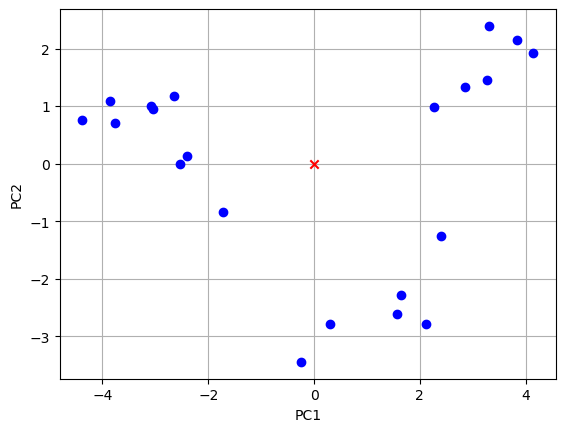

In [34]:
def plot_dataframe(df):
    import matplotlib.pyplot as plt

    cvals = df.columns.values
    xbar = sum(df[cvals[0]]) / len(df)   
    ybar = sum(df[cvals[1]]) / len(df)     
    fig, ax = plt.subplots()
    ax.scatter(df[cvals[0]], df[cvals[1]], c="blue", zorder=2)
    ax.scatter([xbar], [ybar], marker='x', c="red", zorder=3)
    ax.grid()
    ax.set_xlabel(cvals[0])                 
    ax.set_ylabel(cvals[1])
    return fig

df = pd.read_csv("data/UN_IRE_data.csv")

pca = MyPCA(df)
df2 = pca.Y()

fig = plot_dataframe(df2)
print(df2)